# Introdution to Computer Vision Notebook

In this notebook we'll be covering the following topics:

1. opening images
2. looking at pixels & channels
3. Some simple image processing techniques:
    - Color detection
    - Edge & contour detection
    - Face detection
4. Filters & Convolutions

## Dependencies & Downloads

We first need to download the image and import relevant packages. For this tutorial we will be using OpenCV (computer vision library), NumPy (numerical array library) and matplotlib (plotting library).

For our experiments we will be using Van Gogh's famous painting Starry Night. But feel free to use any other image you would like.

![Starry Night](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg "Starry Night")

In [1]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg \
    -O starry_night.jpg

import cv2 #OpenCV, computer vision library
import numpy as np #Numpy, array library
import matplotlib.pyplot as plt #Plotting library

--2023-12-15 14:39:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 2620:0:863:ed1a::2:b, 198.35.26.112
Connecting to upload.wikimedia.org (upload.wikimedia.org)|2620:0:863:ed1a::2:b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220661 (215K) [image/jpeg]
Saving to: ‘starry_night.jpg’

starry_night.jpg    100%[===================>] 215.49K  --.-KB/s    in 0.07s   

2023-12-15 14:39:55 (3.17 MB/s) - ‘starry_night.jpg’ saved [220661/220661]



## 1. Handling Images

OpenCV allows you to read images and puts them into objects called mats (short for matrices) which have a few interesting properties

In [2]:
img = cv2.imread("starry_night.jpg")

In [3]:
print(f"Image Total Size {img.size}")
print(f"Image Shape (Height, Width, Channels): {img.shape}")
print(f"Image cell type {img.dtype}")

Image Total Size 1360329
Image Shape (Height, Width, Channels): (599, 757, 3)
Image cell type uint8


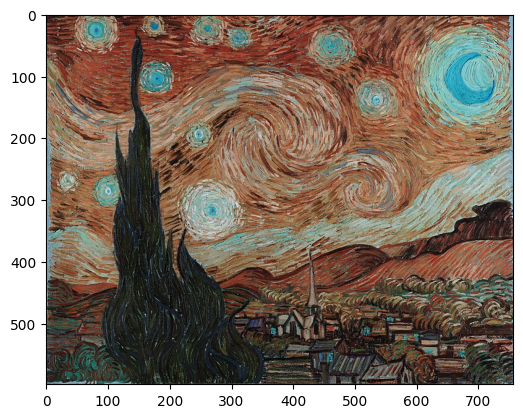

Images in OpenCV are stored as BGR, so we need to convert to RGB using OpenCV


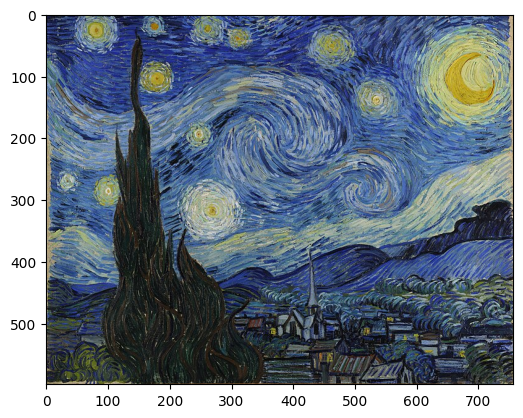

In [4]:
# We can now view the image using matplotlib
plt.imshow(img)
plt.show()
print(f"Images in OpenCV are stored as BGR, so we need to convert to RGB using OpenCV")
#Convert to RGB from BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 2. Selecting Channels and Pixels

Images in OpenCV's are stored using Numpy as arrays, we can manipulate these arrays allow to us to easily to select different channels or groups of individual pixels. 

These Numpy arrays are stored in "row-column" order with the 3 channels in the 3rd dimension as such. Our 3 dimension images represent (Height, Width, Channels). 

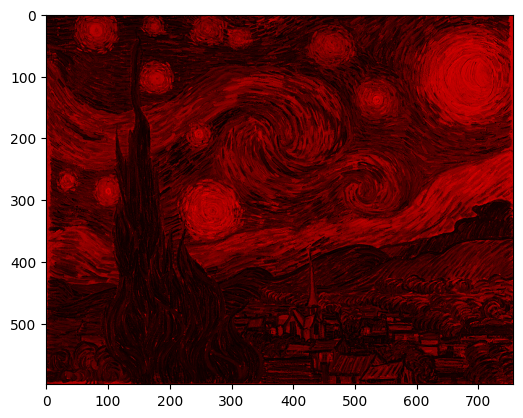

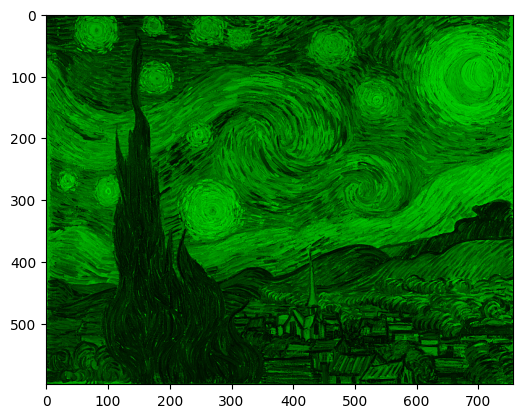

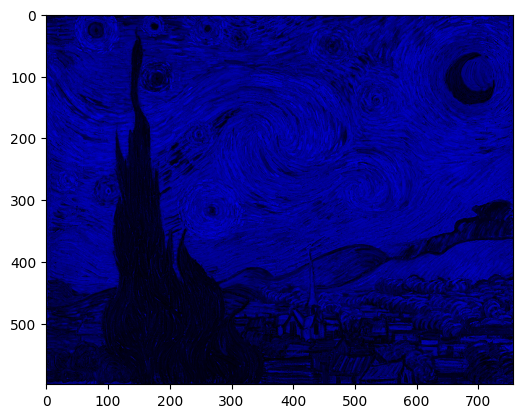

In [5]:
# Display each channel

for c in range(3):
    #Create an empty array of the same size as the image
    ind_channel = np.zeros_like(img)
    #Extract channel from the image and replace in new array
    ind_channel[:,:,c] = img[:,:,c]
    #Plot the 3-channel image with only a single channel from the original
    plt.imshow(ind_channel)
    plt.show()

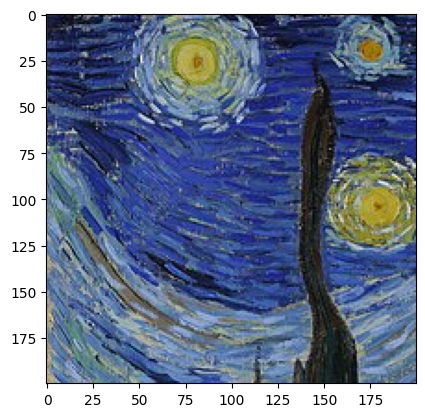

Value of the first pixel [54 64 89]


In [6]:
#Extract Groups of pixels from the image
sub_grid = img[0:200, 0:200, :]
plt.imshow(sub_grid)
plt.show()

#Or get the values for a single pixel in the image, for example the top left
first_pixel = img[0,0,:]
print(f"Value of the first pixel {first_pixel}")


## 3. Some simple examples of image processing

In this tutorial we will be covering a couple simple ways of manipulating images to extract useful information that can be leveraged in real-world applications. 
Here are the examples we will be covering:

- Detecting Stars in Starry Night using Color Detection
- Edge & Contour Detection


### Color Detection

In our image we have a lot of blue representing the sky area, and some bright yellow representing the stars. How could we detect and isolate the stars in this night sky? 

By converting the image to the HSV (Hue, Saturation, Value) color space, we can more easily define a range for filtering. Here's more information about the HSV color space:

- Hue: Represents the color itself, which is very useful for color detection and segmentation. For instance, different shades of green have different RGB values but similar hue values.
- Saturation: Indicates the intensity or purity of the color.
- Value (Brightness): Represents the brightness of the color.
  
![RGB to HSV](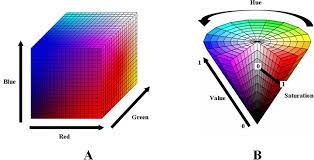 "RGB to HSV")

In this code we will be using OpenCV trackbars to find the right filtering, press 'esc' on your keyboard to break out. As you can see we are using cv2.imshow which allows us to view the image

[ 17  58 109]
[ 61 255 255]


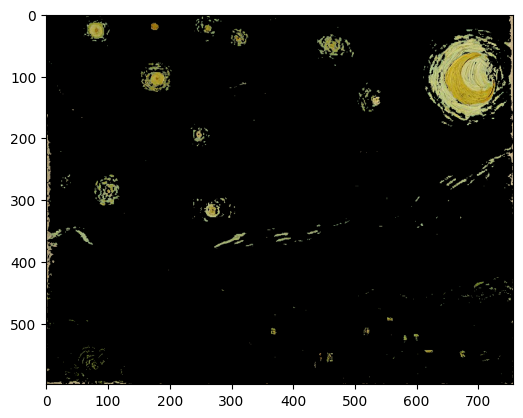

In [10]:
## Interactive Star Detection in Starry Night

def nothing(x):
    pass

# Create a window 
cv2.namedWindow("HSV Adjustments")

# Create trackbars for color change
cv2.createTrackbar('LowerH', 'HSV Adjustments', 0, 179, nothing)
cv2.createTrackbar('LowerS', 'HSV Adjustments', 0, 255, nothing)
cv2.createTrackbar('LowerV', 'HSV Adjustments', 0, 255, nothing)
cv2.createTrackbar('UpperH', 'HSV Adjustments', 179, 179, nothing)
cv2.createTrackbar('UpperS', 'HSV Adjustments', 255, 255, nothing)
cv2.createTrackbar('UpperV', 'HSV Adjustments', 255, 255, nothing)

#Convert the image back to BGR for OpenCV
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

while True:
    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Get current positions of the trackbars
    lh = cv2.getTrackbarPos('LowerH', 'HSV Adjustments')
    ls = cv2.getTrackbarPos('LowerS', 'HSV Adjustments')
    lv = cv2.getTrackbarPos('LowerV', 'HSV Adjustments')
    uh = cv2.getTrackbarPos('UpperH', 'HSV Adjustments')
    us = cv2.getTrackbarPos('UpperS', 'HSV Adjustments')
    uv = cv2.getTrackbarPos('UpperV', 'HSV Adjustments')

    # Set the HSV range according to the trackbar positions
    lower_hsv = np.array([lh, ls, lv])
    upper_hsv = np.array([uh, us, uv])

    # Threshold the HSV image
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Display the result
    #cv2.imshow('Original', img)
    cv2.imshow('Mask', mask)
    cv2.imshow('HSV Adjustments', result[:,:,::-1])

    # Break the loop when 'esc' key is pressed
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

print(lower_hsv)
print(upper_hsv)

cv2.destroyAllWindows()

plt.imshow(result)
plt.show()

### Edge & Contour Detection

Some of the defining features of an image are its edges. Using edges we can detect contours of objects such as a square or a circle. Or in the case of our 

Here is another interactive piece of code where you can play around

In [11]:
def nothing(x):
    pass

# Create a window for edge detection
cv2.namedWindow("Canny Edge Detection")

#Create a window for contour filtering
cv2.namedWindow("Contour Filter")

# Create trackbars for Canny threshold adjustments
cv2.createTrackbar('Lower Threshold', 'Canny Edge Detection', 0, 500, nothing)
cv2.createTrackbar('Upper Threshold', 'Canny Edge Detection', 500, 500, nothing)
cv2.createTrackbar('Edge Dilation', 'Canny Edge Detection', 0, 5, nothing)

#Create trackbars for contour filtering
cv2.createTrackbar('Min Length', 'Contour Filter', 0, 500, nothing)
cv2.createTrackbar('Min Area', 'Contour Filter', 0, 500, nothing)
cv2.createTrackbar('Min Radius', 'Contour Filter', 0, 500, nothing)

#Convert image to grayscale for our edge experiments
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Apply an initial smoothing filter using a gaussian
img_gray = cv2.GaussianBlur(img_gray, (7,7), 0)

while True:

    # Get the current positions of the trackbars for Canny window
    lower = cv2.getTrackbarPos('Lower Threshold', 'Canny Edge Detection')
    upper = cv2.getTrackbarPos('Upper Threshold', 'Canny Edge Detection')
    dilation = cv2.getTrackbarPos('Edge Dilation', 'Canny Edge Detection')

    # Get the current positions of the trackbars for contour window
    min_length = cv2.getTrackbarPos('Min Length', 'Contour Filter')
    min_area = cv2.getTrackbarPos('Min Area', 'Contour Filter')
    min_radius = cv2.getTrackbarPos('Min Radius', 'Contour Filter')
    
    # Apply Canny Edge Detection
    edges = cv2.Canny(img_gray, lower, upper)

    # Dilate the edge image to close gaps
    dilated_edges = cv2.dilate(edges, None, iterations=dilation)

    contours, hierarchy = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Create an image to draw the closed contours
    closed_contours_img = np.zeros_like(img)

    # Check each contour to see if it's closed
    for contour in contours:
        if cv2.contourArea(contour) < min_area:
            continue
        if cv2.arcLength(contour, True) < min_length:
            continue
            
        # Find the minimum enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(contour)
        if int(radius) < min_radius:
            continue
    
        # Draw the circle
        #cv2.circle(contour_image, center, radius, (255, 255, 255), 2)
        
        # Draw the contour if it's closed
        cv2.drawContours(closed_contours_img, [contour], -1, (255, 255, 255), 1)


    # Display the results
    cv2.imshow('Canny Edge Detection', dilated_edges)
    cv2.imshow('Contour Filter', closed_contours_img)

    # Break loop when 'esc' key is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()